# DS2500 Mini-Project: Sunspot Analysis



In [11]:
import scipy.signal as sig
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#the meanings of the data columns as given by https://www.sidc.be/silso/newdataset
headings = ['Year', 'Month', 'Decimal Year', 'Average Daily Number of Observed Sunspots' , 'Sunspot Number Error', 'Nb observations']

#load csv
import csv
with open('SN_m_tot_V2.0.csv', 'r') as sunspotData:
    
    dataList = []
    reader = csv.reader(sunspotData, delimiter=';')
    
    #turn data into list
    for row in reader:
        dataList.append(row)

In [4]:
#get data for axes: we are comparing avg daily sunspots to the position in time, more precisely given by the decimal year
#avg daily sunspots: index 3
#decimal year: index 2

decimalYear = [float(i[2]) for i in dataList]
avgDailySunspots = [float(i[3]) for i in dataList]

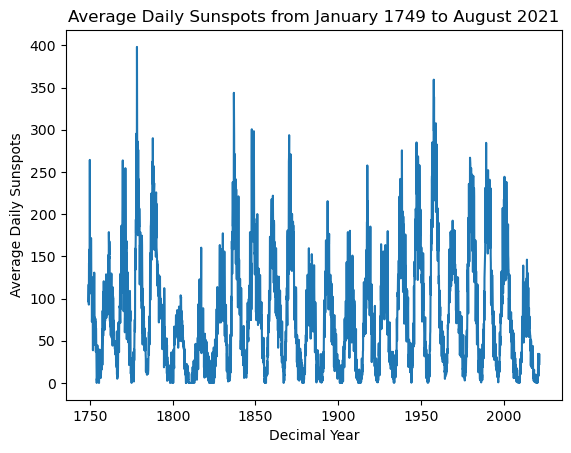

In [5]:

#Visualize the data as is
plt.plot(decimalYear, avgDailySunspots)
plt.title('Average Daily Sunspots from January 1749 to August 2021')
plt.xlabel('Decimal Year')
plt.ylabel('Average Daily Sunspots')
plt.show()

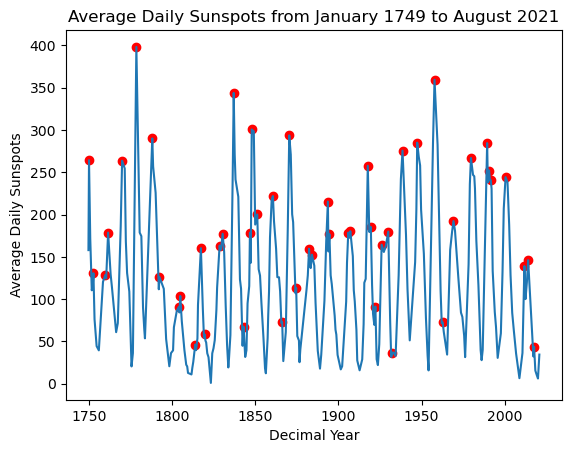

In [8]:

#function to de-fuzz the graph to make the maxima more clearly visible
#finds the peak values and their corresponding year, repeats the process if needed
#when graphed, it will connect the resulting peak values with a line.
def iteratePeaks(x, y, iterations=1):
    
    #get indices of "peak" y values
    peakIndices = sig.find_peaks(y)
    
    #find new sets of x and y values such that the peaks are more clear
    new_x = [x[i] for i in peakIndices[0]]
    new_y = [y[i] for i in peakIndices[0]]
    
    #use recursion to find the peaks among the peaks, if necessary
    if iterations - 1 == 0:
        return (new_x, new_y)
        
    else:
        return(iteratePeaks(new_x, new_y, iterations - 1))
    
#2 iterations was enough for a clearer graph without significant loss of detail
iteration_x2, iteration_y2 = iteratePeaks(decimalYear, avgDailySunspots, 2)

#the third iteration is used to help highlight all the necessary points
iteration_x3, iteration_y3 = iteratePeaks(decimalYear, avgDailySunspots, 3)

#plot the data
plt.plot(iteration_x2, iteration_y2)
plt.scatter(iteration_x3, iteration_y3, color='r')
plt.title('Average Daily Sunspots from January 1749 to August 2021')
plt.xlabel('Decimal Year')
plt.ylabel('Average Daily Sunspots')
plt.show()

As seen above, a lot of points we don't need are also highlighted.
Through this method, I could not find a general way to get rid of the extraneous points provided by the 3rd iteration.
Therefore, for the time being, I will remove them manually.


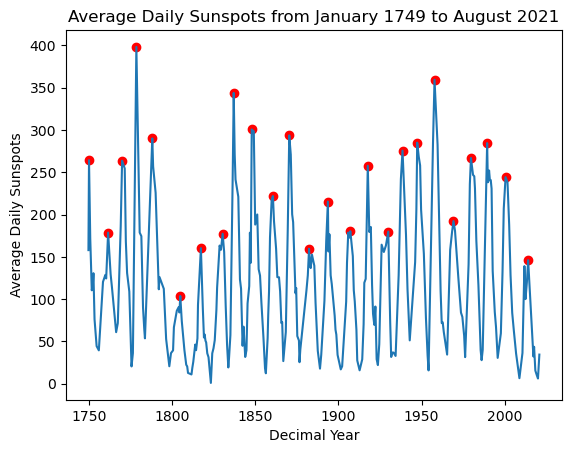

In [9]:

badPointIndices = [1,2,7,8,10,12,13,16,17,19,21,23,25,27,28,31,32,33,35,39,43,44,46,48]

#final set of points containing all true peaks and their respective years
peakYears = [iteration_x3[i] for i in range(len(iteration_x3)) if i not in badPointIndices]
onlyPeaks = [iteration_y3[i] for i in range(len(iteration_y3)) if i not in badPointIndices]


#revised visualization
plt.plot(iteration_x2, iteration_y2)
plt.scatter(peakYears, onlyPeaks, color='r')
plt.title('Average Daily Sunspots from January 1749 to August 2021')
plt.xlabel('Decimal Year')
plt.ylabel('Average Daily Sunspots')
plt.show()

In [10]:
#finally, the average of the differences between the years will be the estimate for the cycle duration
diff = [(peakYears[i+1] - peakYears[i]) for i in range(len(peakYears) - 1)]
np.mean(diff)

11.010375000000002

<strong>The estimate for the length of the sunspot cycle was found to be 11.010375000000002 years.</strong>

***The original assignment stopped at this point.

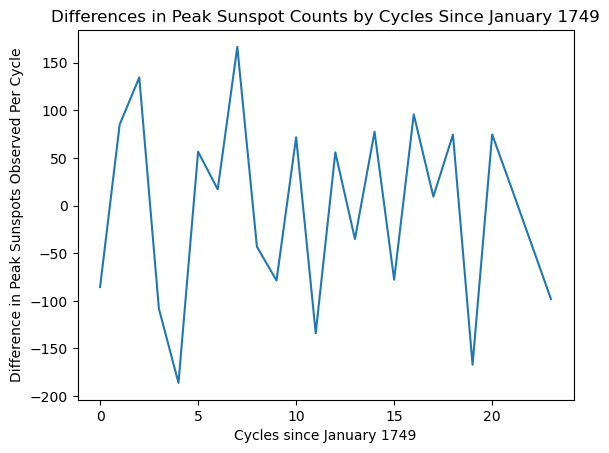

In [78]:
y = np.array([onlyPeaks[i+1] - onlyPeaks[i] for i in range(len(onlyPeaks) - 1)]).reshape(-1, 1)
x = np.arange(0, len(y), 1).reshape(-1, 1)

plt.plot(x,y)
plt.title('Differences in Peak Sunspot Counts by Cycles Since January 1749')
plt.xlabel('Cycles since January 1749')
plt.ylabel('Difference in Peak Sunspots Observed Per Cycle')
plt.show()

In [79]:
linmodel = LinearRegression()

linmodel.fit(x, y)
y_pred = linmodel.predict(y)
print(linmodel.intercept_, linmodel.coef_[0])


[4.207] [-0.79408696]


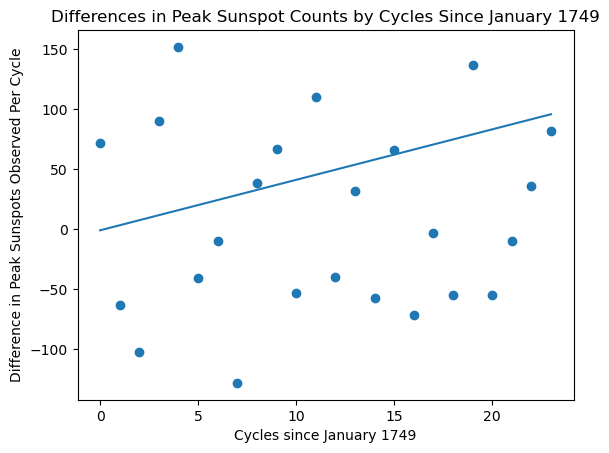

In [85]:

plt.scatter(x,y_pred)
plt.plot(x, linmodel.intercept_ * x + linmodel.coef_[0])
plt.title('Differences in Peak Sunspot Counts by Cycles Since January 1749')
plt.xlabel('Cycles since January 1749')
plt.ylabel('Difference in Peak Sunspots Observed Per Cycle')
plt.show()